# DLHub: A Data and Learning Hub for Science

DLHub is a self-service platform for publishing, applying, and creating machine learning (ML) models, including deep learning (DL) models, and associated data transformations. It is:

1. A **model serving infrastructure**: Users can easily run or test models (and also other related services, such as data transformations) via simple Web calls.

2. A **model registry**: Model developers can easily publish models, along with associated descriptive metadata and training data, so that they can then be discovered, cited, and reused by others.

3. A **model development system**: Developers of new models can easily access the data and computing infrastructure needed to re-train models for new applications.

DLHub benefits users in many ways. Data scientists can publish models (i.e., architectures and weights) and methods. Other scientists can apply existing models to new data with ease (e.g., by querying a prediction API for a deployed model). They can easily create new models with state-of-the-art techniques. Together, these capabilities lower barriers to employing ML/DL, making it easier for researchers to benefit from advances in ML/DL technologies.


# In this notebook
The basics usage of the DLHubCLient is covered. This includes:
* Instantiation and authentication
* Listing available servables
* Running a servable on a set of data

## Instantiate the DLHub Client

In [1]:
from dlhub_sdk.client import DLHubClient

dl = DLHubClient()

## Get the servables available to you

In [2]:
servables = dl.get_servables()
servables

[{'datacite': {'alternateIdentifiers': [{'alternateIdentifier': 'https://github.com/mcherukara/CDI_NN',
     'alternateIdentifierType': 'URL'}],
   'creators': [{'affiliations': 'Argonne National Laboratory',
     'familyName': 'Cherukara',
     'givenName': 'Mathew J'},
    {'affiliations': 'Argonne National Laboratory',
     'familyName': 'Nashed',
     'givenName': 'Youssef SG'},
    {'affiliations': 'Argonne National Laboratory',
     'familyName': 'Harder',
     'givenName': 'Ross J'}],
   'identifier': {'identifier': '10.YET/UNASSIGNED', 'identifierType': 'DOI'},
   'publicationYear': '2019',
   'publisher': 'DLHub',
   'relatedIdentifiers': [{'relatedIdentifier': '10.1038/s41598-018-34525-1',
     'relatedIdentifierType': 'DOI',
     'relationType': 'IsDescribedBy'}],
   'resourceType': {'resourceTypeGeneral': 'InteractiveResource'},
   'titles': [{'title': 'Coherent Diffraction Phase Prediction'}]},
  'dlhub': {'domains': ['materials science'],
   'ecr_uri': '039706667969.dkr.e

In [3]:
print("There are {} servables available in DLHub".format(len(servables)))

There are 23 servables available in DLHub


## Load MNIST test and train data

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


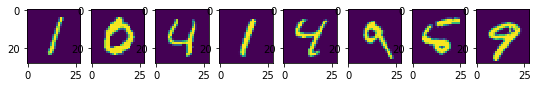

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 8
offset = 2

fig, axs = plt.subplots(1,n_samples,
                        figsize=(9,3))
for i in range(0,n_samples):
    axs[i].imshow(x_test[i+offset])

## Make Predictions
A pretrained model, here called "mnist", is used to make predictions on a selection of the test set.

In [6]:
serv = dl.get_id_by_name("mnist_keras")
out = dl.run(serv, inputs=x_new[offset:offset+n_samples].tolist())
probabilities = pd.DataFrame(out)

AttributeError: 'DLHubClient' object has no attribute 'get_id_by_name'

In [7]:
probabilities

NameError: name 'probabilities' is not defined